<a href="https://colab.research.google.com/github/Deer1012/github/blob/main/%E5%9F%BA%E7%A4%8E%E7%89%A9%E4%BB%B6%E5%B0%8E%E5%90%91%E6%9C%9F%E6%9C%AB%E4%BD%9C%E6%A5%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# 爬取物價指數數據
def scrape_inflation_data():
    # 替換成實際的物價指數數據網站
    url = 'https://www.stat.gov.tw/cl.aspx?n=2663'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # 提取物價指數數據
    # 這裡以表格為例，實際情況可能需要根據網站的 HTML 結構進行修改
    tables = soup.find_all('table', {'class': 'table'})

    return tables

# 訓練物價指數趨勢預測模型
def train_inflation_prediction_model(data):
    # 使用線性回歸模型進行訓練
    X = np.arange(len(data)).reshape(-1, 1)
    y = data['Inflation Index']

    model = LinearRegression()
    model.fit(X, y)

    return model

# 預測未來物價指數
def predict_future_inflation(model, data, periods=5):
    future_periods = np.arange(len(data), len(data) + periods).reshape(-1, 1)
    future_inflation = model.predict(future_periods)

    return future_inflation

if __name__ == "__main__":
    # 爬取物價指數數據
    inflation_data = scrape_inflation_data()

    # 訓練物價指數趨

<ipython-input-14-21de614773e7>:76: UserWarning: Glyph 32113 (\N{CJK UNIFIED IDEOGRAPH-7D71}) missing from current font.
  plt.savefig('workflow.png')
<ipython-input-14-21de614773e7>:76: UserWarning: Glyph 35336 (\N{CJK UNIFIED IDEOGRAPH-8A08}) missing from current font.
  plt.savefig('workflow.png')
<ipython-input-14-21de614773e7>:76: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  plt.savefig('workflow.png')
<ipython-input-14-21de614773e7>:76: UserWarning: Glyph 29289 (\N{CJK UNIFIED IDEOGRAPH-7269}) missing from current font.
  plt.savefig('workflow.png')
<ipython-input-14-21de614773e7>:76: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from current font.
  plt.savefig('workflow.png')
<ipython-input-14-21de614773e7>:76: UserWarning: Glyph 25351 (\N{CJK UNIFIED IDEOGRAPH-6307}) missing from current font.
  plt.savefig('workflow.png')
<ipython-input-14-21de614773e7>:76: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) 

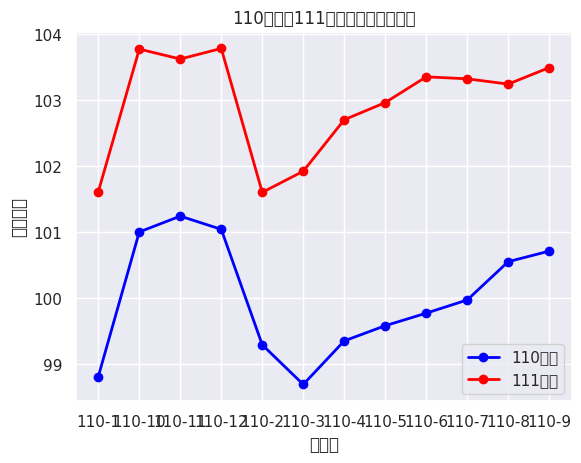

In [14]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname='/content/NotoSansHK-VariableFont_wght.ttf')
import pandas as pd

# 110年度的數據
data_str_110 = """
統計期	物價指數
110年1月	98.81
110年2月	99.29
110年3月	98.69
110年4月	99.35
110年5月	99.58
110年6月	99.77
110年7月	99.97
110年8月	100.55
110年9月	100.71
110年10月	101
110年11月	101.24
110年12月	101.04
"""

# 將數據讀取為DataFrame
data_110 = pd.read_csv(StringIO(data_str_110), delimiter='\t')

# 提取年份和月份
data_110[['年份', '月份']] = data_110['統計期'].str.extract('(\d+)年(\d+)月')

# 將統計期轉換為日期時間格式
data_110['統計期'] = data_110['年份'] + '-' + data_110['月份']

# 111年度的數據
data_str_111 = """
統計期	物價指數
111年1月	101.61
111年2月	101.6
111年3月	101.92
111年4月	102.7
111年5月	102.96
111年6月	103.35
111年7月	103.32
111年8月	103.24
111年9月	103.49
111年10月	103.77
111年11月	103.62
111年12月	103.78
"""

# 將數據讀取為DataFrame
data_111 = pd.read_csv(StringIO(data_str_111), delimiter='\t')

# 提取年份和月份
data_111[['年份', '月份']] = data_111['統計期'].str.extract('(\d+)年(\d+)月')

# 將統計期轉換為日期時間格式
data_111['統計期'] = data_111['年份'] + '-' + data_111['月份']

# 根據統計期排序
data_110 = data_110.sort_values('統計期')
data_111 = data_111.sort_values('統計期')

# 提取110年度和111年度的物價指數數據
x = data_110['統計期']
y_110 = data_110['物價指數']
y_111 = data_111['物價指數']

# 繪製折線圖
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x, y_110, label='110年度', color='blue', linewidth=2, marker='o')
plt.plot(x, y_111, label='111年度', color='red', linewidth=2, marker='o')
plt.xlabel('統計期')
plt.ylabel('物價指數')
plt.title('110年度與111年度物價指數折線圖')
plt.legend()
plt.savefig('workflow.png')
plt.show()

